In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

In [3]:
emails = pd.read_csv("emails.csv")

print(emails.shape)

(5172, 3002)


In [4]:
emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
emails.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [6]:
emails.isnull().any().value_counts()

False    3002
dtype: int64

In [7]:
emails.isnull().any().sum()

0

In [8]:
emails.drop(columns='Email No.', inplace=True)

In [9]:
emails.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [10]:
emails.Prediction.unique()

array([0, 1], dtype=int64)

In [11]:
emails['Prediction'] = emails['Prediction'].replace({0:'Not spam', 1:'Spam'})

In [12]:
X = emails.drop(columns='Prediction',axis = 1)
y = emails['Prediction']

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=8)

In [14]:
oldmodels={"KNN": KNeighborsClassifier(n_neighbors=7),
        "DecisionTree":DecisionTreeClassifier(random_state=0)
        }

In [15]:
newmodels={"Logistic Regression": LogisticRegression(random_state=8, solver='lbfgs', max_iter=2000),
        "Linear SVM":LinearSVC(random_state=8, max_iter=3000),
        "RBF SVM":SVC(kernel="rbf", random_state=8),
        "Multi-layer Perceptron Classification": MLPClassifier(hidden_layer_sizes=[20, 20], \
                                                           learning_rate='adaptive', random_state=8),
        "MultinominalNB":MultinomialNB(),
        "RandomForestClassifier":RandomForestClassifier()
        }

In [16]:
def report(model):
    print(classification_report(y_pred,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

In [17]:
for model_name, model in oldmodels.items():
    y_pred=model.fit(X_train, y_train).predict(X_test)
    print(f"Accuracy for {model_name} model : {accuracy_score(y_test, y_pred)}")

Accuracy for KNN model : 0.8654292343387471
Accuracy for DecisionTree model : 0.934261407579273


KNN
              precision    recall  f1-score   support

    Not spam       0.95      0.95      0.95       901
        Spam       0.89      0.89      0.89       392

    accuracy                           0.93      1293
   macro avg       0.92      0.92      0.92      1293
weighted avg       0.93      0.93      0.93      1293



C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 

DecisionTree
              precision    recall  f1-score   support

    Not spam       0.95      0.95      0.95       901
        Spam       0.89      0.89      0.89       392

    accuracy                           0.93      1293
   macro avg       0.92      0.92      0.92      1293
weighted avg       0.93      0.93      0.93      1293



C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 

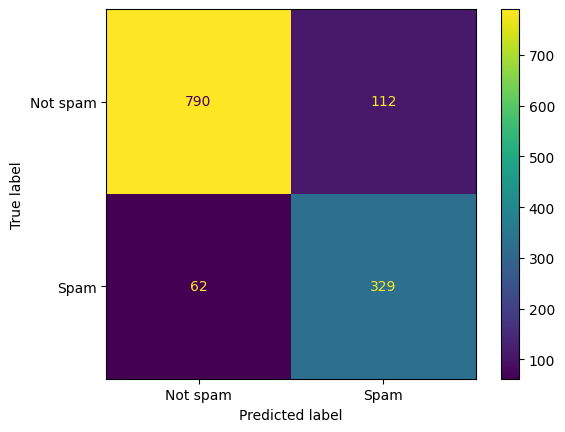

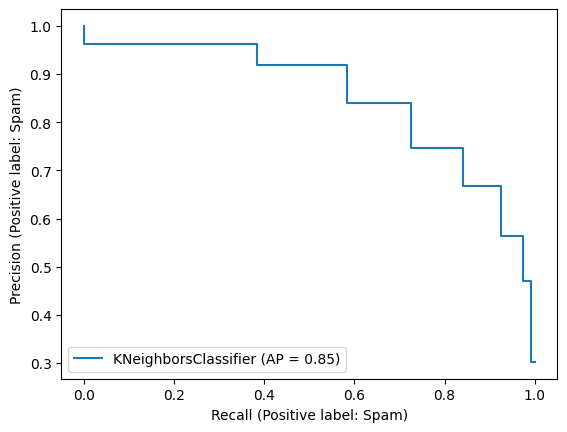

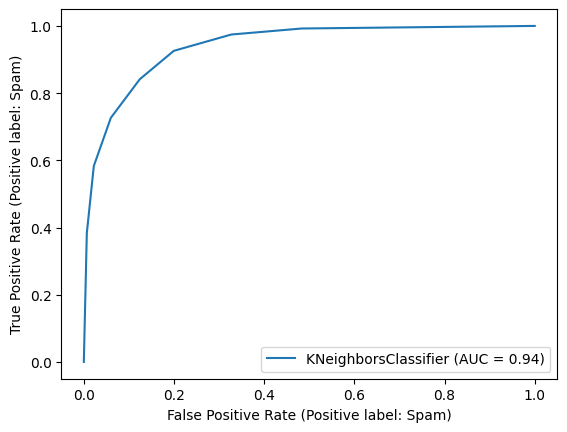

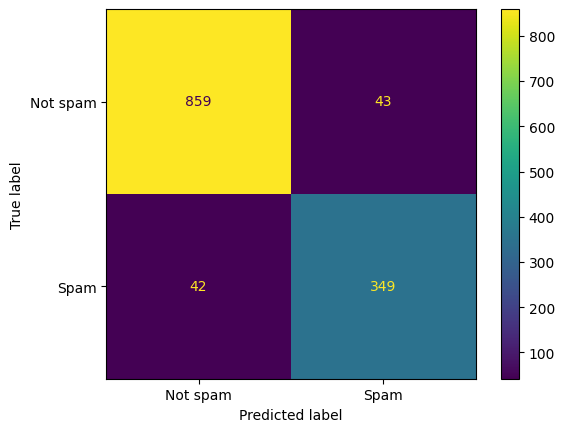

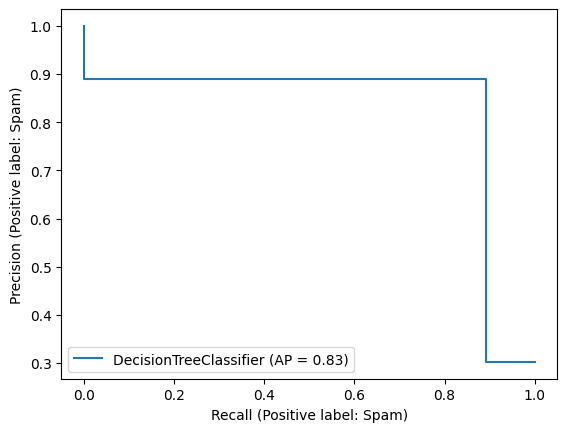

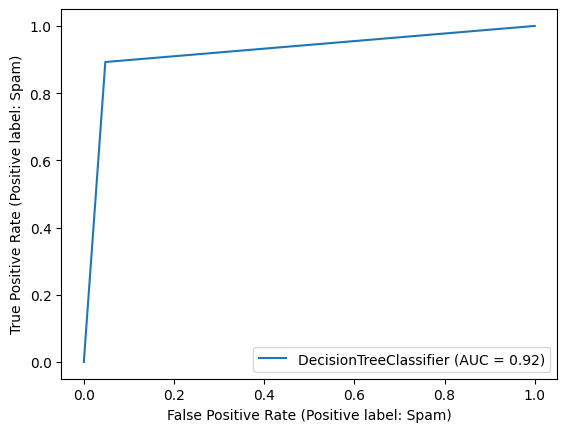

In [18]:
for model_name, model in oldmodels.items():
    print(model_name)
    report(model)

In [34]:
for model_name, model in newmodels.items():
    y_pred=model.fit(X_train, y_train).predict(X_test)
    print(f"Accuracy for {model_name} model : {accuracy_score(y_test, y_pred)}")

Accuracy for Logistic Regression model : 0.9806651198762568


C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy for Linear SVM model : 0.9706109822119103
Accuracy for RBF SVM model : 0.7950502706883217
Accuracy for Multi-layer Perceptron Classification model : 0.9822119102861562
Accuracy for MultinominalNB model : 0.954369682907966
Accuracy for RandomForestClassifier model : 0.9690641918020109


Logistic Regression
              precision    recall  f1-score   support

    Not spam       0.98      0.97      0.98       908
        Spam       0.94      0.96      0.95       385

    accuracy                           0.97      1293
   macro avg       0.96      0.97      0.96      1293
weighted avg       0.97      0.97      0.97      1293

Linear SVM


C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 

              precision    recall  f1-score   support

    Not spam       0.98      0.97      0.98       908
        Spam       0.94      0.96      0.95       385

    accuracy                           0.97      1293
   macro avg       0.96      0.97      0.96      1293
weighted avg       0.97      0.97      0.97      1293

RBF SVM


C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 

              precision    recall  f1-score   support

    Not spam       0.98      0.97      0.98       908
        Spam       0.94      0.96      0.95       385

    accuracy                           0.97      1293
   macro avg       0.96      0.97      0.96      1293
weighted avg       0.97      0.97      0.97      1293



C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 

Multi-layer Perceptron Classification
              precision    recall  f1-score   support

    Not spam       0.98      0.97      0.98       908
        Spam       0.94      0.96      0.95       385

    accuracy                           0.97      1293
   macro avg       0.96      0.97      0.96      1293
weighted avg       0.97      0.97      0.97      1293

MultinominalNB


C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 

              precision    recall  f1-score   support

    Not spam       0.98      0.97      0.98       908
        Spam       0.94      0.96      0.95       385

    accuracy                           0.97      1293
   macro avg       0.96      0.97      0.96      1293
weighted avg       0.97      0.97      0.97      1293

RandomForestClassifier
              precision    recall  f1-score   support

    Not spam       0.98      0.97      0.98       908
        Spam       0.94      0.96      0.95       385

    accuracy                           0.97      1293
   macro avg       0.96      0.97      0.96      1293
weighted avg       0.97      0.97      0.97      1293



C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\achra\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 

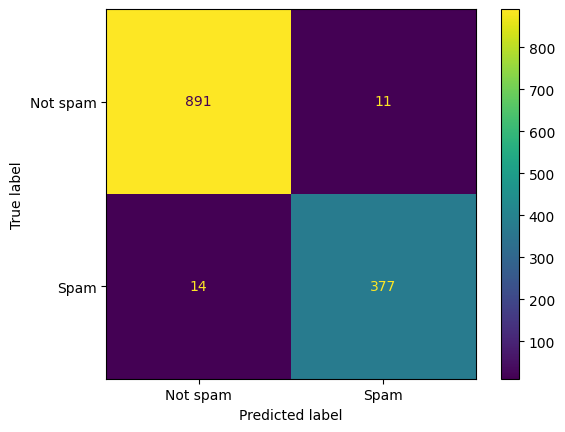

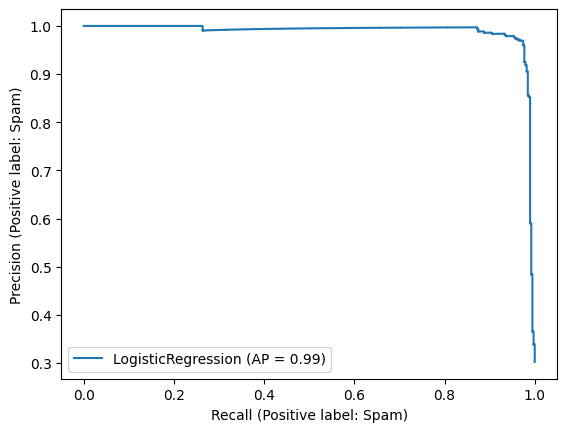

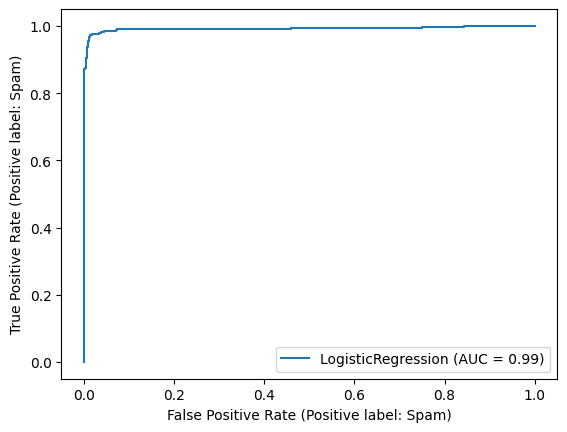

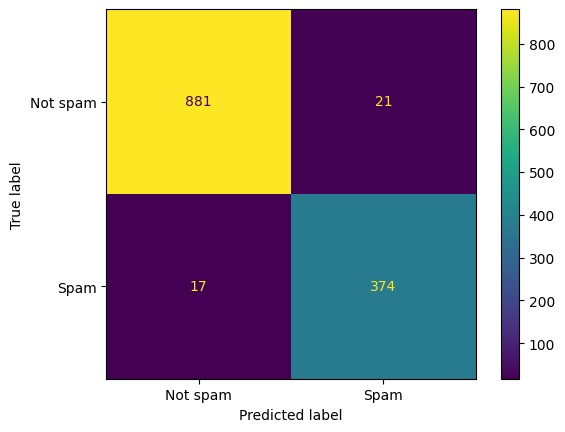

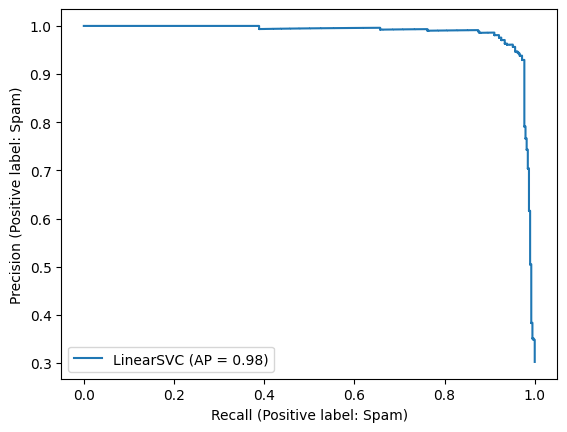

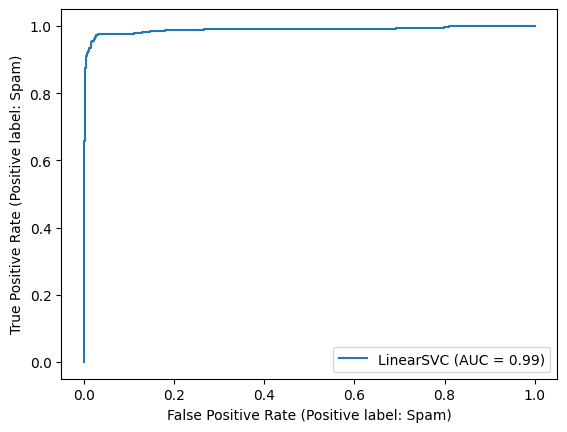

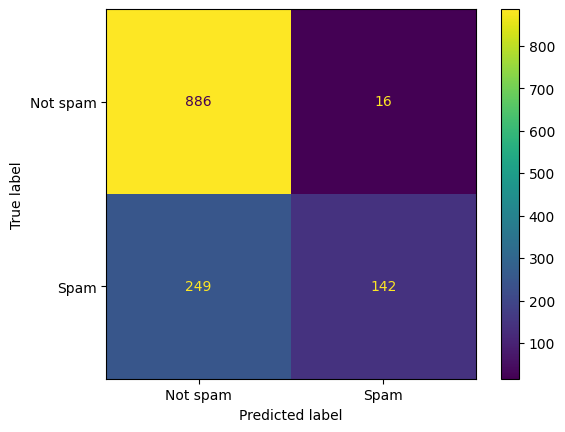

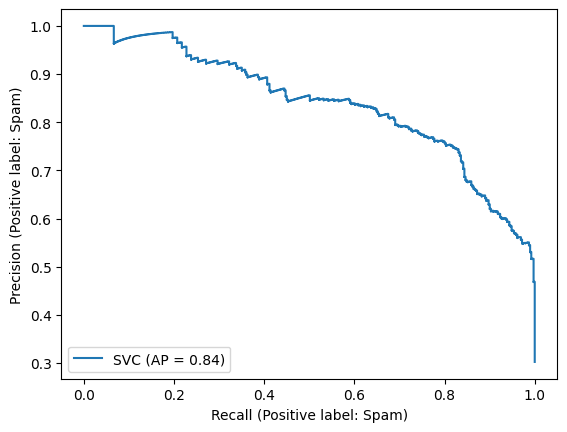

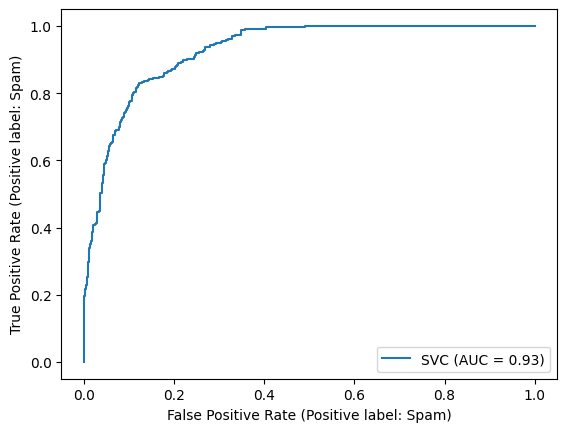

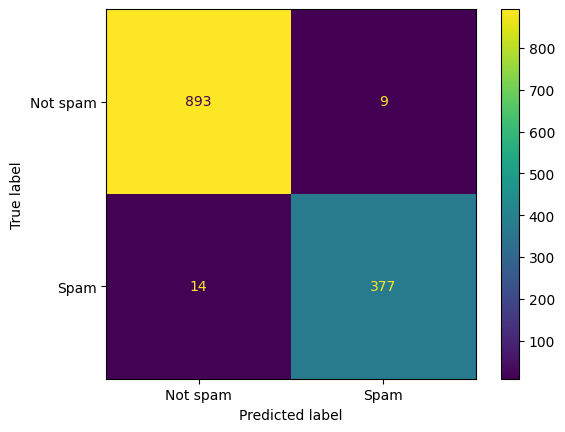

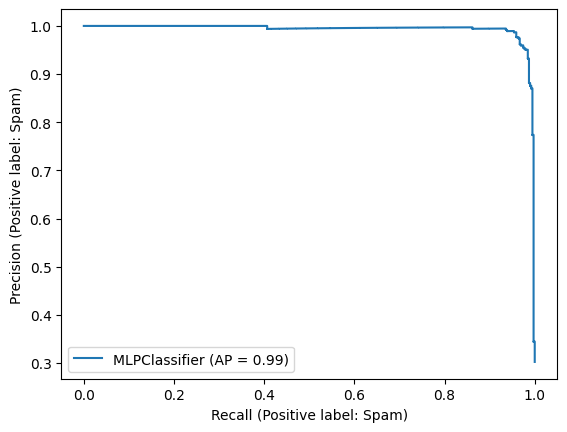

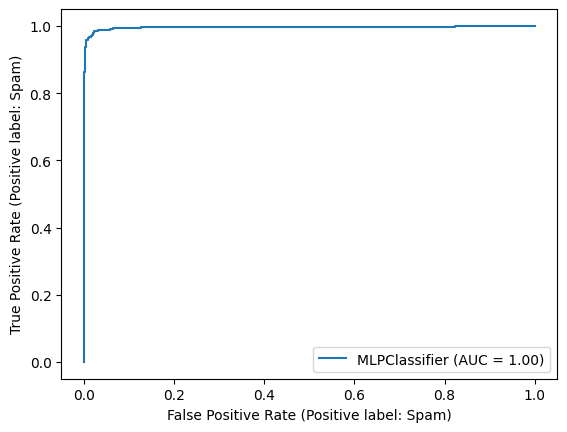

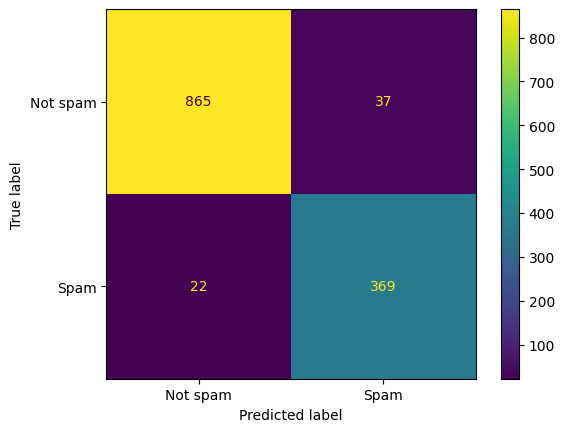

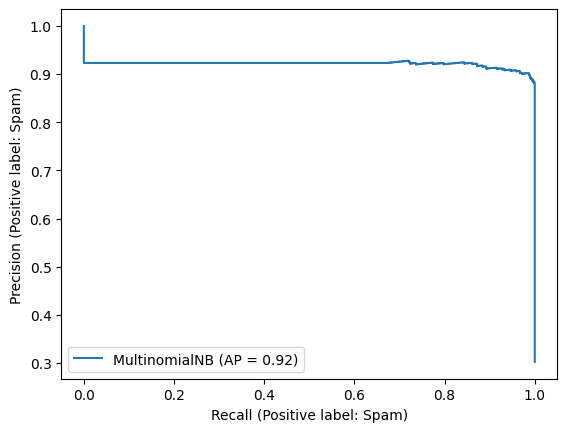

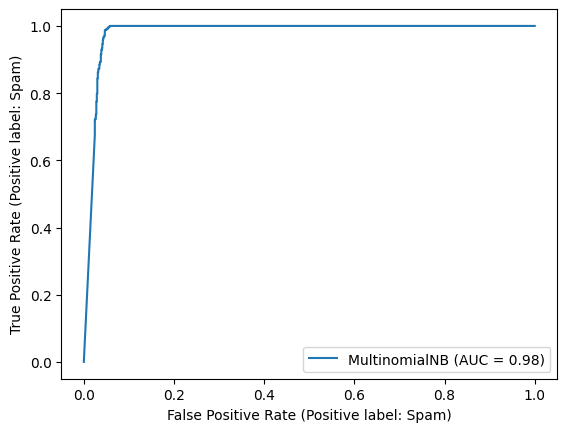

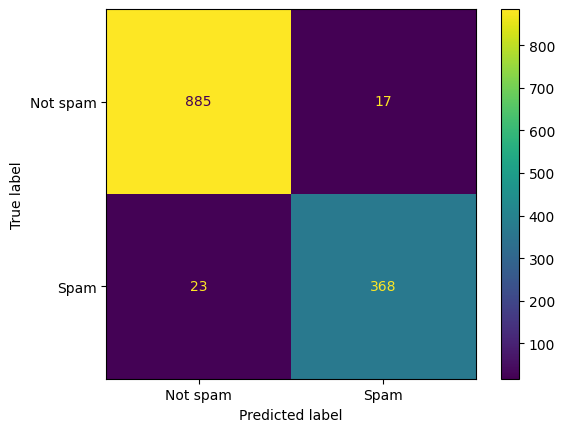

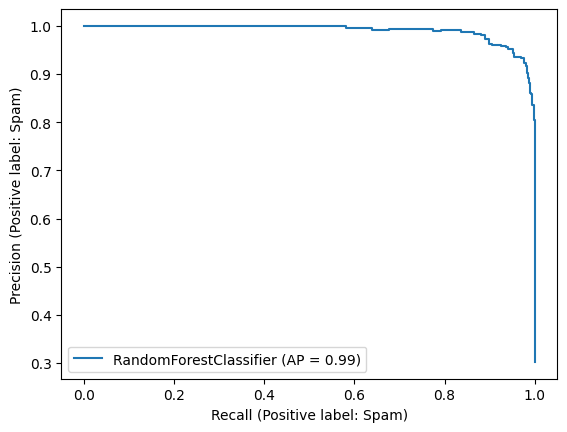

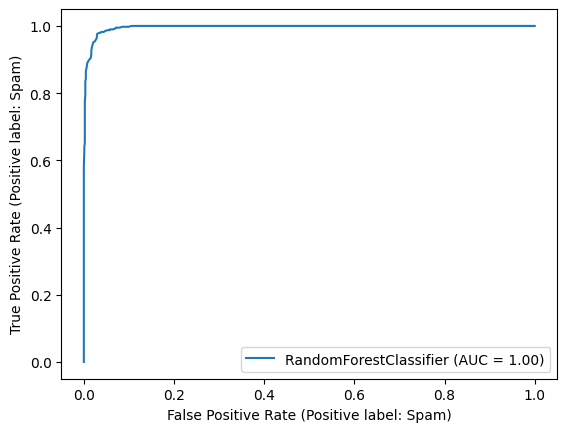

In [35]:
for model_name, model in newmodels.items():
    print(model_name)
    report(model)

In [39]:
param_grid={ 'max_depth':np.arange(1,101),'criterion':["entropy","gini"]}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=4)
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)

0.9153132250580047
{'criterion': 'entropy', 'max_depth': 68}


In [40]:
param_grid1={ 'max_depth':np.arange(1,101),'criterion':["entropy","gini"]}
grid1=GridSearchCV(RandomForestClassifier(),param_grid1,cv=4)
grid1.fit(X,y)
print(grid1.best_score_)
print(grid1.best_params_)

0.9646171693735499
{'criterion': 'entropy', 'max_depth': 52}


In [19]:
param_grid2={ 'learning_rate':['constant', 'invscaling', 'adaptive'],'activation':['identity', 'logistic']}
grid2=GridSearchCV(MLPClassifier(),param_grid2,cv=4)
grid2.fit(X,y)
print(grid2.best_score_)
print(grid2.best_params_)

0.9706109822119103
{'activation': 'identity', 'learning_rate': 'adaptive'}
